In [1]:
import pandas as pd
import numpy as np

In [2]:
pengSize = pd.read_csv('penguins_size1.csv')
pengSize.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
252,Gentoo,Biscoe,48.7,15.7,208,5350,MALE
315,Gentoo,Biscoe,49.1,15.0,228,5500,MALE
103,Adelie,Biscoe,43.2,19.0,197,4775,MALE
38,Adelie,Dream,44.1,19.7,196,4400,MALE
183,Chinstrap,Dream,52.0,20.7,210,4800,MALE
207,Chinstrap,Dream,46.8,16.5,189,3650,FEMALE
310,Gentoo,Biscoe,48.4,14.4,203,4625,FEMALE
85,Adelie,Dream,41.1,18.1,205,4300,MALE
11,Adelie,Torgersen,38.7,19.0,195,3450,FEMALE
319,Gentoo,Biscoe,43.3,14.0,208,4575,FEMALE


In [3]:
pengSize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [4]:
pengSize.loc[pengSize['sex'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [5]:
pengSize.loc[pengSize['species'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [6]:
pengSize.loc[pengSize['culmen_length_mm'].isnull()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex


In [7]:
pengSize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 18.3+ KB


In [8]:
pengSize['island'] = pengSize['island'].replace({'Torgersen' : 0, 'Biscoe' : 1,  'Dream' : 2})
pengSize['sex'] = pengSize['sex'].replace({'MALE' : 0, 'FEMALE' : 1})
pengSize['species'] = pengSize['species'].replace({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
pengSize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_g        333 non-null    int64  
 6   sex                333 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 18.3 KB


In [9]:
x_data = pengSize[['island','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex']]
x_data.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181,3750,0
1,0,39.5,17.4,186,3800,1
2,0,40.3,18.0,195,3250,1
3,0,36.7,19.3,193,3450,1
4,0,39.3,20.6,190,3650,0


In [10]:
y_target = pengSize['species']
y_target.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_data = scaler.fit_transform(x_data)

x_data = pd.DataFrame(x_data, columns = ['island','culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g','sex'])

X_train, X_test, y_train, y_test = train_test_split(
    x_data, y_target, test_size=0.33, stratify=y_target
)

In [12]:
from sklearn import tree

DecisionTree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                                          max_depth=4, max_features=None, max_leaf_nodes=None,
                                          min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                                          min_weight_fraction_leaf=0.0, splitter='best')
DecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
x_data.sample(10)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
226,0.5,0.487273,0.071429,0.711864,0.541667,1.0
159,1.0,0.723636,0.595238,0.491525,0.375000,0.0
332,0.5,0.647273,0.357143,0.694915,0.750000,0.0
108,0.5,0.272727,0.904762,0.322034,0.333333,1.0
251,0.5,0.432727,0.059524,0.610169,0.458333,1.0
127,1.0,0.196364,0.642857,0.457627,0.493056,0.0
38,1.0,0.436364,0.785714,0.406780,0.472222,0.0
131,1.0,0.294545,0.833333,0.474576,0.354167,0.0
163,1.0,0.941818,0.559524,0.152542,0.277778,1.0
109,0.5,0.385455,0.619048,0.406780,0.381944,0.0


In [14]:
from sklearn.metrics import accuracy_score

y_pred = DecisionTree.predict(X_test)
treeAccuracy = accuracy_score(y_pred, y_test)
print(treeAccuracy)

0.9727272727272728


In [15]:
# import pickle

# filename = 'trainmodel.sav'
# pickle.dump(DecisionTree, open(filename, 'wb'))

In [16]:
# loaded_model = pickle.load(open('trainmodel.sav', 'rb'))

In [17]:
# loaded_model.fit(X_train, y_train)

# y_pred = loaded_model.predict(X_test)
# treeAccuracy = accuracy_score(y_pred, y_test)
# print(treeAccuracy)

In [20]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=42,
)

In [21]:
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=42)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate Mean Squared Error (MSE)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error (MSE):", mse)

# # Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(y_test, y_pred)
# print("Mean Absolute Error (MAE):", mae)

# # Calculate R-squared (R2)
# r2 = r2_score(y_test, y_pred)
# print("R-squared (R2):", r2)

# accuracy_like_metric = (r2 + 1) / 2

# print("Accuracy-like Metric:", accuracy_like_metric)

Accuracy: 98.18%


In [25]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf')  # You can adjust C and other hyperparameters
svm_classifier.fit(X_train, y_train)

svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 60.00%


                   precision    recall  f1-score   support

   Species Adelie       0.96      0.98      0.97        48
Species Chinstrap       0.95      0.91      0.93        23
   Species Gentoo       1.00      1.00      1.00        39

         accuracy                           0.97       110
        macro avg       0.97      0.96      0.97       110
     weighted avg       0.97      0.97      0.97       110



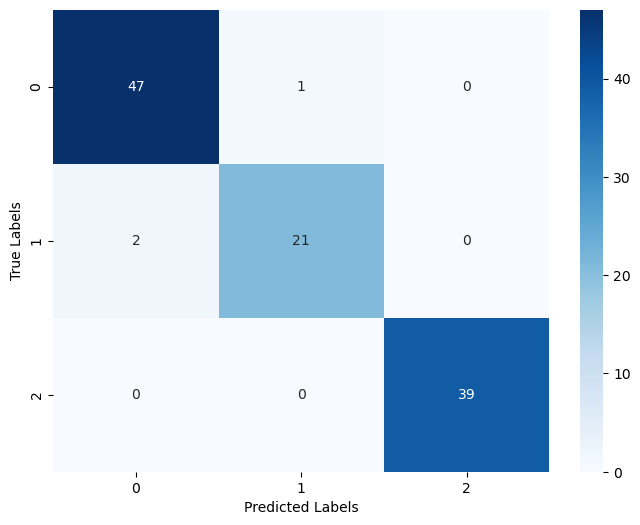

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report # Import library untuk menampilkan Confucion Matrix
import seaborn as sns # Import library visualisasi untuk Confucion Matrix
import matplotlib.pyplot as plt

# Mengitung Confucion Matrix dari hasil testing
y_pred = DecisionTree.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)

class_names=['Species Adelie', 'Species Chinstrap', 'Species Gentoo']
print(classification_report(y_test, y_pred, target_names=class_names))

# Menampilkan Confucion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

                   precision    recall  f1-score   support

   Species Adelie       0.96      1.00      0.98        48
Species Chinstrap       1.00      0.91      0.95        23
   Species Gentoo       1.00      1.00      1.00        39

         accuracy                           0.98       110
        macro avg       0.99      0.97      0.98       110
     weighted avg       0.98      0.98      0.98       110



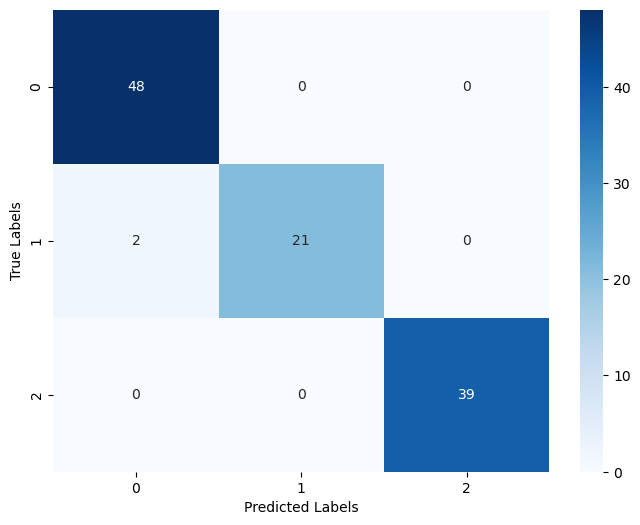

In [28]:
y_pred = rf.predict(X_test)
class_names=['Species Adelie', 'Species Chinstrap', 'Species Gentoo']
print(classification_report(y_test, y_pred, target_names=class_names))
y_pred = rf.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
# Menampilkan Confucion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

                   precision    recall  f1-score   support

   Species Adelie       0.54      0.54      0.54        48
Species Chinstrap       0.28      0.22      0.24        23
   Species Gentoo       0.80      0.90      0.84        39

         accuracy                           0.60       110
        macro avg       0.54      0.55      0.54       110
     weighted avg       0.58      0.60      0.59       110



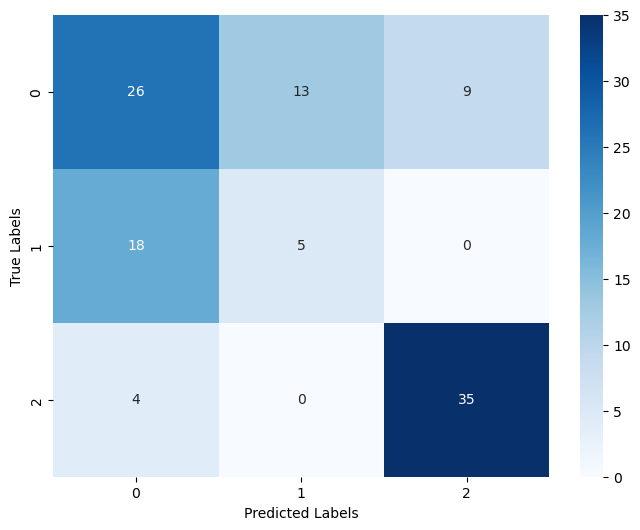

In [33]:
y_pred = svc.predict(X_test)
class_names=['Species Adelie', 'Species Chinstrap', 'Species Gentoo']
print(classification_report(y_test, y_pred, target_names=class_names))
y_pred = svc.predict(X_test) 
cm = confusion_matrix(y_test, y_pred)
# Menampilkan Confucion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [31]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

k = 5
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
rf = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=42,
)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train the Random Forest classifier on the current fold
    rf.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred_val = rf.predict(X_val_fold)

    # Calculate accuracy on the validation set and append to the list
    accuracy_val = accuracy_score(y_val_fold, y_pred_val)
    accuracy_scores.append(accuracy_val)

    print(f"Fold {fold + 1} - Accuracy: {accuracy_val}")

# Calculate and print the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"\nAverage Accuracy: {average_accuracy}")

Fold 1 - Accuracy: 0.9777777777777777
Fold 2 - Accuracy: 1.0
Fold 3 - Accuracy: 0.9555555555555556
Fold 4 - Accuracy: 1.0
Fold 5 - Accuracy: 1.0

Average Accuracy: 0.9866666666666667


In [30]:
from sklearn.model_selection import KFold
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

k = 5
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
DecisionTree = tree.DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                                          max_depth=4, max_features=None, max_leaf_nodes=None,
                                          min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=2,
                                          min_weight_fraction_leaf=0.0, splitter='best')
DecisionTree.fit(X_train, y_train)
kf = KFold(n_splits=k, shuffle=True, random_state=42)
accuracy_scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[test_index]

    # Train the Random Forest classifier on the current fold
    DecisionTree.fit(X_train_fold, y_train_fold)

    # Predict on the validation set
    y_pred_val = DecisionTree.predict(X_val_fold)

    # Calculate accuracy on the validation set and append to the list
    accuracy_val = accuracy_score(y_val_fold, y_pred_val)
    accuracy_scores.append(accuracy_val)

    print(f"Fold {fold + 1} - Accuracy: {accuracy_val}")

# Calculate and print the average accuracy across all folds
average_accuracy = sum(accuracy_scores) / len(accuracy_scores)
print(f"\nAverage Accuracy: {average_accuracy}")

Fold 1 - Accuracy: 0.9555555555555556
Fold 2 - Accuracy: 1.0
Fold 3 - Accuracy: 0.9555555555555556
Fold 4 - Accuracy: 0.9772727272727273
Fold 5 - Accuracy: 0.9772727272727273

Average Accuracy: 0.9731313131313133
